In [4]:
import pandas as pd
import numpy as np

In [5]:
high_schools = pd.read_csv('../data/full_highschool_data.csv')
high_schools.shape

/var/folders/07/lc6xyqmx2szbq9t8c_f7m2pm0000gn/T/ipykernel_14155/2139419286.py:1: DtypeWarning: Columns (804,805,1040,1041,1159,1160,1203) have mixed types. Specify dtype option on import or set low_memory=False.
  high_schools = pd.read_csv('../data/full_highschool_data.csv')


(7356, 1397)

In [6]:
high_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7356 entries, 0 to 7355
Columns: 1397 entries, LEA_STATE to ACT
dtypes: bool(16), float64(1362), int64(3), object(16)
memory usage: 77.6+ MB


In [7]:
high_schools.dropna(subset=['ACT'], inplace=True)
high_schools.shape

(6918, 1397)

In [8]:
# sort columns by percentage NA
(high_schools.isna().sum()/high_schools.shape[0]).sort_values(ascending=False)

SCH_HBREPORTED_DIS_WH_F       1.0
SCH_DISCWODIS_MULTOOS_AM_M    1.0
SCH_DISCWODIS_MULTOOS_WH_F    1.0
SCH_DISCWODIS_MULTOOS_WH_M    1.0
SCH_DISCWODIS_MULTOOS_BL_F    1.0
                             ... 
TOT_DISCWODIS_EXPZT_F         0.0
TOT_DISCWODIS_EXPZT_M         0.0
SCH_DISCWODIS_EXPZT_TR_F      0.0
SCH_DISCWODIS_EXPZT_TR_M      0.0
ACT                           0.0
Length: 1397, dtype: float64

In [9]:
# drop columns with no data
high_schools = high_schools.dropna(axis=1, how='all')
high_schools.shape

(6918, 914)

In [10]:
# fill in values for missing indicators
high_schools['SCH_FIREARM_IND'].fillna(False, inplace=True)
high_schools['SCH_HOMICIDE_IND'].fillna(False, inplace=True)
high_schools['SCH_RET_G09_IND'].fillna(False, inplace=True)
high_schools['SCH_RET_G10_IND'].fillna(False, inplace=True)
high_schools['SCH_RET_G11_IND'].fillna(False, inplace=True)
high_schools['SCH_SSCLASSES_IND'].fillna(False, inplace=True)
high_schools['SCH_APSEL'].fillna(False, inplace=True)
high_schools['SCH_APMATHENR_IND'].fillna(False, inplace=True)
high_schools['SCH_APSCIENR_IND'].fillna(False, inplace=True)
high_schools['SCH_APOTHENR_IND'].fillna(False, inplace=True)

In [11]:
# fix enrolment for special cases
high_schools[~high_schools['SCH_APENR_IND']].filter(regex=r'.*_AP.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_CORPINSTANCES_IND']].filter(regex=r'.*_(DISCWO?DIS|CORPINSTANCES).*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_CREDITRECOVERY_IND']].filter(regex=r'.*_CREDITRECOVERY.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_DUAL_IND']].filter(regex=r'.*_DUAL.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_GT_IND']].filter(regex=r'.*_GTENR.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_IBENR_IND']].filter(regex=r'.*_IB.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_SSCLASSES_IND']].filter(regex=r'.*_SSCLASSES.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_SSATHLETICS_IND']].filter(regex=r'.*_SS(SPORTS|TEAMS|PART).*',axis=1).fillna(0, inplace=True)

In [12]:
# drop columns with more than 60% na vals
high_schools = high_schools.dropna(axis=1, thresh=int(high_schools.shape[0]*(1-.6)))
high_schools.shape

(6918, 837)

In [13]:
high_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6918 entries, 0 to 7355
Columns: 837 entries, LEA_STATE to ACT
dtypes: bool(26), float64(804), int64(3), object(4)
memory usage: 43.0+ MB


In [14]:
high_schools.dtypes

LEA_STATE                     object
LEA_STATE_NAME                object
LEAID                          int64
LEA_NAME                      object
SCHID                          int64
                              ...   
SCH_DISCWDIS_TFRALT_LEP_M    float64
SCH_DISCWDIS_TFRALT_LEP_F    float64
SCH_DISCWDIS_TFRALT_504_M    float64
SCH_DISCWDIS_TFRALT_504_F    float64
ACT                          float64
Length: 837, dtype: object

In [15]:
# mark state and district name as a categorical variable
from sklearn.preprocessing import OrdinalEncoder
high_schools['LEA_STATE_NAME'] = OrdinalEncoder().fit_transform(high_schools['LEA_STATE_NAME'].to_numpy().reshape(-1,1))
high_schools['LEA_NAME'] = OrdinalEncoder().fit_transform(high_schools['LEA_NAME'].to_numpy().reshape(-1,1))

In [16]:
g = high_schools.columns.to_series().groupby(high_schools.dtypes).groups
high_schools = high_schools.loc[:,~high_schools.columns.isin({k.name: v for k, v in g.items()}['object'])]

In [17]:
high_schools = high_schools.drop(['LEAID', 'SCHID', 'COMBOKEY'], axis = 1)

In [18]:
high_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6918 entries, 0 to 7355
Columns: 832 entries, LEA_STATE_NAME to ACT
dtypes: bool(26), float64(806)
memory usage: 42.8 MB


In [19]:
high_schools.head(10)

LEA_STATE_NAME  LEA_NAME  SCH_MATHCLASSES_ADVM  SCH_MATHCERT_ADVM  \
0             7.0     869.0                  10.0                2.0   
1             7.0     869.0                  14.0                2.0   
2             7.0     869.0                   4.0                1.0   
3             7.0     869.0                  10.0                4.0   
4             7.0     869.0                  18.0                3.0   
5             7.0     869.0                  19.0                5.0   
6             7.0     869.0                  13.0                3.0   
7             7.0     869.0                   9.0                1.0   
8             7.0     869.0                   1.0                0.0   
9             7.0     869.0                  16.0                0.0   

   SCH_MATHENR_ADVM_HI_M  SCH_MATHENR_ADVM_HI_F  SCH_MATHENR_ADVM_AM_M  \
0                    7.0                    9.0                    1.0   
1                    9.0                   11.0                    1.0   
2                    7.0                    4.0                    0.0   
3                   21.0                   15.0                    0.0   
4                   12.0                   27.0                    1.0   
5                   21.0                   13.0                    3.0   
6                   12.0                   15.0                    1.0   
7                   12.0                    9.0                    0.0   
8                    0.0                    0.0                    0.0   
9                   11.0                   14.0                    3.0   

   SCH_MATHENR_ADVM_AM_F  SCH_MATHENR_ADVM_AS_M  SCH_MATHENR_ADVM_AS_F  ...  \
0                    1.0                    4.0                    0.0  ...   
1                    4.0                    0.0                    0.0  ...   
2                    0.0                    2.0                    1.0  ...   
3                    0.0                    3.0                    4.0  ...   
4                    0.0                    3.0                    1.0  ...   
5                    1.0                    3.0                    4.0  ...   
6                    1.0                    0.0                    2.0  ...   
7                    2.0                    0.0                    1.0  ...   
8                    0.0                    0.0                    0.0  ...   
9                    1.0                    5.0                    2.0  ...   

   SCH_DISCWDIS_TFRALT_IDEA_WH_F  SCH_DISCWDIS_TFRALT_IDEA_TR_M  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   
5                            0.0                            0.0   
6                            0.0                            0.0   
7                            0.0                            0.0   
8                            0.0                            0.0   
9                            0.0                            0.0   

   SCH_DISCWDIS_TFRALT_IDEA_TR_F  TOT_DISCWDIS_TFRALT_IDEA_M  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
5                            0.0                         0.0   
6                            0.0                         0.0   
7                            0.0                         0.0   
8                            0.0                         0.0   
9                            0.0                         0.0   

   TOT_DISCWDIS_TFRALT_IDEA_F  SCH_DISCWDIS_TFRALT_LEP_M  \
0                     

<AxesSubplot:xlabel='LEA_STATE_NAME', ylabel='ACT'>

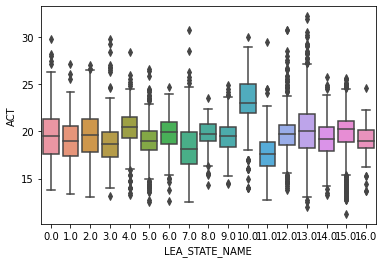

In [20]:
import seaborn as sns
sns.boxplot(x='LEA_STATE_NAME', y='ACT', data=high_schools)

In [21]:
high_schools.to_csv('../data/high_schools.csv',index=False)

In [22]:
X = high_schools.iloc[:,:-1]
y = high_schools['ACT']

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [24]:
from sklearn.impute import KNNImputer
X_scaler = KNNImputer().fit_transform(X_scaler)

In [25]:
# replace missing data with either mean or median depending on skewness
# from scipy.stats import skew
#
# for i, col in enumerate(high_schools.columns):
#     if high_schools[col].dtype == object:
#         continue
#     sk = skew(high_schools[col], nan_policy='omit')
#     if abs(sk) > 1:
#         high_schools[col].fillna(high_schools[col].median(), inplace=True)
#     else:
#         high_schools[col].fillna(high_schools[col].mean(), inplace=True)

In [26]:
X_scaler_df = pd.DataFrame(X_scaler, columns=X.columns)
X_scaler_df.isna().sum()

LEA_STATE_NAME                0
LEA_NAME                      0
SCH_MATHCLASSES_ADVM          0
SCH_MATHCERT_ADVM             0
SCH_MATHENR_ADVM_HI_M         0
                             ..
TOT_DISCWDIS_TFRALT_IDEA_F    0
SCH_DISCWDIS_TFRALT_LEP_M     0
SCH_DISCWDIS_TFRALT_LEP_F     0
SCH_DISCWDIS_TFRALT_504_M     0
SCH_DISCWDIS_TFRALT_504_F     0
Length: 831, dtype: int64

In [27]:
np.isnan(X_scaler).sum()

0

In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [29]:
pca = PCA()
pca.fit_transform(X_scaler)

array([[ 2.47099745e+00, -6.93021965e-01,  8.05858821e+00, ...,
         2.21259880e-16,  8.87938893e-16,  1.02634649e-14],
       [ 5.55673379e+00, -5.35143619e+00,  3.63261464e+00, ...,
        -9.79319797e-16, -1.60766758e-15,  1.45974989e-15],
       [-6.44028517e+00, -5.60648052e-01, -1.01801320e-01, ...,
         5.41215730e-17,  6.86433034e-16,  1.91504717e-14],
       ...,
       [-5.91744748e-01,  4.53855040e-01, -3.63375978e+00, ...,
        -1.24874413e-16, -8.09134652e-17, -1.20914153e-16],
       [-1.03360169e+01,  1.00380727e+00, -6.73234651e-01, ...,
         2.39380196e-17, -1.42350454e-16,  8.51784124e-17],
       [-7.09759382e+00, -1.05113845e-01, -1.52463917e+00, ...,
        -2.25452049e-16, -1.70892685e-16, -5.43470825e-17]])

In [30]:
pca.explained_variance_ratio_

array([1.88469405e-01, 6.37070572e-02, 3.75040951e-02, 3.57837321e-02,
       2.88890086e-02, 2.67987333e-02, 2.37385641e-02, 1.98061773e-02,
       1.57067621e-02, 1.32747030e-02, 1.28660452e-02, 1.08062008e-02,
       1.06938398e-02, 9.49944766e-03, 8.39196782e-03, 7.74690060e-03,
       7.59124323e-03, 7.33185661e-03, 7.09515047e-03, 6.70067480e-03,
       6.50648527e-03, 6.33657677e-03, 5.90493801e-03, 5.82797487e-03,
       5.74280697e-03, 5.58790893e-03, 5.31442710e-03, 5.25900121e-03,
       5.08692387e-03, 4.87334292e-03, 4.75234524e-03, 4.62170370e-03,
       4.52578380e-03, 4.40580901e-03, 4.34592596e-03, 4.22818215e-03,
       4.14194259e-03, 4.10833692e-03, 3.98117067e-03, 3.84080636e-03,
       3.80693425e-03, 3.75142938e-03, 3.70773626e-03, 3.65354697e-03,
       3.56902542e-03, 3.51872847e-03, 3.41383533e-03, 3.39908965e-03,
       3.38342330e-03, 3.28188365e-03, 3.21029116e-03, 3.16790086e-03,
       3.09237245e-03, 3.03371592e-03, 2.95929494e-03, 2.91882490e-03,
      

In [31]:
pca.explained_variance_ratio_.cumsum()

array([0.1884694 , 0.25217646, 0.28968056, 0.32546429, 0.3543533 ,
       0.38115203, 0.4048906 , 0.42469677, 0.44040353, 0.45367824,
       0.46654428, 0.47735048, 0.48804432, 0.49754377, 0.50593574,
       0.51368264, 0.52127388, 0.52860574, 0.53570089, 0.54240156,
       0.54890805, 0.55524463, 0.56114956, 0.56697754, 0.57272035,
       0.57830826, 0.58362268, 0.58888168, 0.59396861, 0.59884195,
       0.6035943 , 0.608216  , 0.61274178, 0.61714759, 0.62149352,
       0.6257217 , 0.62986364, 0.63397198, 0.63795315, 0.64179396,
       0.64560089, 0.64935232, 0.65306006, 0.6567136 , 0.66028263,
       0.66380136, 0.66721519, 0.67061428, 0.67399771, 0.67727959,
       0.68048988, 0.68365778, 0.68675015, 0.68978387, 0.69274316,
       0.69566199, 0.69849868, 0.70123652, 0.70391871, 0.70659406,
       0.70923437, 0.71185233, 0.71442521, 0.7169572 , 0.71945602,
       0.7219002 , 0.72433454, 0.72672888, 0.72908486, 0.73143069,
       0.73376178, 0.73606188, 0.73832998, 0.74056118, 0.74277

Text(0, 0.5, 'Cumulative Explained Variance')

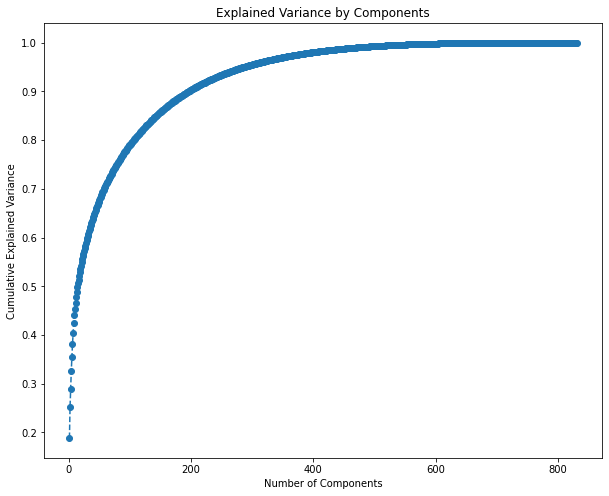

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(range(1,832), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [33]:
# Preserving 80% of the variance, we choose 120 components and fit the model to our data.
pca = PCA(n_components=120)
pca.fit(X_scaler)

PCA(n_components=120)

In [34]:
# We need the calculated resulting components scores for the elements in our dataset
scores_pca = pca.transform(X_scaler)

In [35]:
# Fitting K means with the transformed data from the PCA
wcss = []

for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

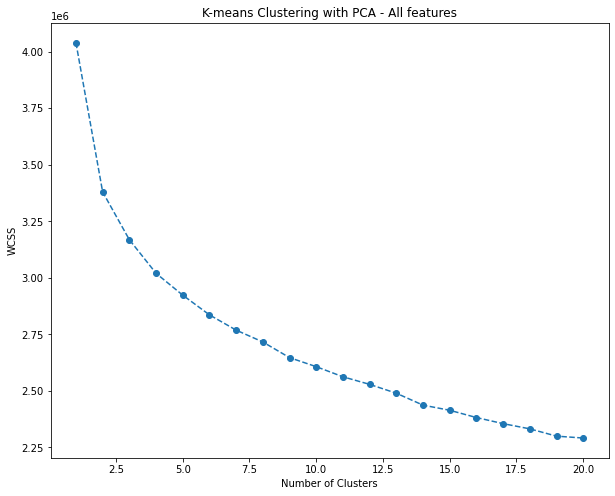

In [36]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle = '--')
plt.title('K-means Clustering with PCA - All features')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

i=2, score=0.422722716345213
i=3, score=0.3884766456942468
i=4, score=0.31105357550926305
i=5, score=0.31553689798258444
i=6, score=0.31596621920411117
i=7, score=0.2362406758798142
i=8, score=0.3221727437672656
i=9, score=0.23896985822526115
i=10, score=0.21655109900389152
i=11, score=0.2115582157414223
i=12, score=0.20038378724113604
i=13, score=0.20341292612153944
i=14, score=0.1611012162073784
i=15, score=0.1743788493228338
i=16, score=0.13722922874180973
i=17, score=0.22638372817322336


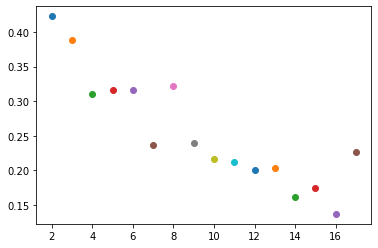

In [37]:
from sklearn.metrics import silhouette_score


for i in range(2,18):
    km = KMeans(i, random_state=42)
    km.fit(scores_pca)
    score = silhouette_score(scores_pca, km.labels_, metric = 'euclidean')
    plt.scatter(i, score)
    print(f'{i=}, {score=}')

In [38]:
# We choose 5 clusters from the Elbow method so we run it with 5 clusters and same initializer and random state
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [39]:
kmeans_pca_labels = kmeans_pca.fit(scores_pca)

In [40]:
# Copy original X dataset to X_pca so we can add the principal components and labels to it
X_pca = X_scaler
X_pca = pd.DataFrame(X_pca)

In [41]:
X_pca

0         1         2         3         4         5         6    \
0    -0.370670 -0.953540  0.161024 -0.631112 -0.273063 -0.240599  0.326862   
1    -0.370670 -0.953540  0.567727 -0.631112 -0.221471 -0.190434  0.326862   
2    -0.370670 -0.953540 -0.449032 -0.745176 -0.273063 -0.366011 -0.255570   
3    -0.370670 -0.953540  0.161024 -0.402983  0.088078 -0.090105 -0.255570   
4    -0.370670 -0.953540  0.974430 -0.517047 -0.144084  0.210883  0.326862   
...        ...       ...       ...       ...       ...       ...       ...   
6913  1.513149  1.291307 -0.855735 -0.745176 -0.443315 -0.456307 -0.255570   
6914  1.513149  1.291307 -0.245680 -0.174855 -0.144084 -0.090105 -0.255570   
6915  1.513149  1.362979 -0.144004 -0.060791 -0.015105 -0.014858 -0.255570   
6916  1.513149  1.682408 -0.652383 -0.631112 -0.453633 -0.466340 -0.255570   
6917  1.513149  1.626663 -0.652383 -0.631112 -0.453633 -0.466340 -0.255570   

           7         8         9    ...       821       822       823  \
0     0.207380 -0.021939 -0.334357  ... -0.202925 -0.127021 -0.097642   
1     1.560626 -0.315887 -0.334357  ... -0.202925 -0.127021 -0.097642   
2    -0.243701 -0.168913 -0.260719  ... -0.202925 -0.127021 -0.097642   
3    -0.243701 -0.095426 -0.039807  ... -0.202925 -0.127021 -0.097642   
4    -0.243701 -0.095426 -0.260719  ... -0.202925 -0.127021 -0.097642   
...        ...       ...       ...  ...       ...       ...       ...   
6913 -0.243701 -0.315887 -0.334357  ... -0.202925 -0.127021 -0.097642   
6914 -0.243701 -0.315887 -0.260719  ... -0.202925 -0.127021 -0.097642   
6915 -0.243701 -0.315887 -0.260719  ... -0.202925 -0.127021 -0.097642   
6916 -0.243701 -0.315887 -0.334357  ... -0.202925 -0.127021 -0.097642   
6917 -0.243701 -0.315887 -0.334357  ... -0.202925 -0.127021 -0.097642   

           824       825       826       827       828       829       830  
0    -0.055902 -0.265758 -0.191704 -0.104003 -0.054456 -0.151187 -0.107252  
1    -0.055902 -0.265758 -0.191704 -0.104003 -0.054456 -0.151187 -0.107252  
2    -0.055902 -0.265758 -0.191704 -0.104003 -0.054456 -0.151187 -0.107252  
3    -0.055902 -0.265758 -0.191704 -0.104003 -0.054456 -0.151187 -0.107252  
4    -0.055902 -0.265758 -0.191704 -0.104003 -0.054456 -0.151187 -0.107252  
...        ...       ...       ...       ...       ...       ...       ...  
6913 -0.055902 -0.265758 -0.191704 -0.104003 -0.054456 -0.151187 -0.107252  
6914 -0.055902 -0.265758 -0.191704 -0.104003 -0.054456 -0.151187 -0.107252  
6915 -0.055902 -0.265758 -0.191704 -0.104003 -0.054456 -0.151187 -0.107252  
6916 -0.055902 -0.265758 -0.191704 -0.104003 -0.054456 -0.151187 -0.107252  
6917 -0.055902 -0.265758 -0.191704 -0.104003 -0.054456 -0.151187 -0.107252  

[6918 rows x 831 columns]

In [42]:
scores_pca_df = pd.DataFrame(scores_pca)
scores_pca_df.columns = ['Cp1', 'Cp2', 'Cp3', 'Cp4', 'Cp5', 'Cp6', 'Cp7', 'Cp8', 'Cp9', 'Cp10', 'Cp11', 'Cp12', 'Cp13', 'Cp14', 'Cp15', 'Cp16', 'Cp17', 'Cp18', 'Cp19', 'Cp20', 'Cp21', 'Cp22', 'Cp23', 'Cp24', 'Cp25', 'Cp26', 'Cp27', 'Cp28', 'Cp29', 'Cp30', 'Cp31', 'Cp32', 'Cp33', 'Cp34', 'Cp35', 'Cp36', 'Cp37', 'Cp38', 'Cp39', 'Cp40', 'Cp41', 'Cp42', 'Cp43', 'Cp44', 'Cp45', 'Cp46', 'Cp47', 'Cp48', 'Cp49', 'Cp50', 'Cp51', 'Cp52', 'Cp53', 'Cp54', 'Cp55', 'Cp56', 'Cp57', 'Cp58', 'Cp59', 'Cp60', 'Cp61', 'Cp62', 'Cp63', 'Cp64', 'Cp65', 'Cp66', 'Cp67', 'Cp68', 'Cp69', 'Cp70', 'Cp71', 'Cp72', 'Cp73', 'Cp74', 'C75', 'Cp76', 'Cp77', 'Cp78', 'Cp79', 'Cp80', 'Cp81', 'Cp82', 'Cp83', 'Cp84', 'Cp85', 'Cp86', 'Cp87', 'Cp88', 'Cp89', 'Cp90', 'Cp91', 'Cp92', 'Cp93', 'Cp94', 'Cp95', 'Cp96', 'Cp97', 'Cp98', 'Cp99', 'Cp100', 'Cp101', 'Cp102', 'Cp103', 'Cp104', 'Cp105', 'Cp106', 'Cp107', 'Cp108', 'Cp109', 'Cp110', 'Cp111', 'Cp112', 'Cp113', 'Cp114', 'Cp115', 'Cp116', 'Cp117', 'Cp118', 'Cp119', 'Cp120']
scores_pca_df

Cp1       Cp2        Cp3       Cp4       Cp5       Cp6       Cp7  \
0      2.470997 -0.693022   8.058588  5.059384 -2.485570  3.505342  0.441495   
1      5.556734 -5.351436   3.632615  7.820212 -1.743224 -0.045998  1.394883   
2     -6.440285 -0.560648  -0.101801 -0.243945  0.217815  2.342331 -1.803029   
3      6.925788 -4.278303   7.564931  3.218977 -2.757831  2.887189  0.202648   
4      6.530181 -1.060949  13.164680  3.734243 -2.638172  4.314061  1.259583   
...         ...       ...        ...       ...       ...       ...       ...   
6913 -10.451484  0.990870  -0.844014 -1.185566  1.192801  0.910135 -0.057843   
6914  -3.579051 -1.320233  -2.057086 -0.010442 -2.160303 -0.371447  1.193117   
6915  -0.591745  0.453855  -3.633760 -1.163448 -1.107124 -0.206516  6.158252   
6916 -10.336017  1.003807  -0.673235 -1.200448  0.919128  0.769574 -0.509272   
6917  -7.097594 -0.105114  -1.524639 -1.353762 -0.382462 -0.413239 -0.500199   

           Cp8       Cp9      Cp10  ...     Cp111     Cp112     Cp113  \
0    -3.196291 -0.369245  1.599326  ... -0.695148 -0.161678  0.571813   
1    -3.862788 -1.818329  0.855338  ... -0.381313 -1.125535  0.754234   
2    -0.918421  0.755946 -0.039873  ... -0.528789  0.518923 -0.188699   
3    -4.964493 -0.004769 -0.176122  ... -0.444383  0.212318  0.201038   
4    -4.490118  1.416284  1.775662  ... -1.552707 -1.264288  0.573162   
...        ...       ...       ...  ...       ...       ...       ...   
6913  0.916979  0.432556  0.108283  ... -0.011323 -0.081229  0.227138   
6914 -0.429757 -0.225520  0.870468  ... -0.337644  0.411323  0.190950   
6915  3.231721  2.541575 -2.801949  ...  0.015608  0.069192  0.579806   
6916  0.360809 -0.379732  0.097719  ...  0.265150 -0.046331 -0.311285   
6917 -0.252532 -0.017217  0.064960  ...  3.586047  1.987701  0.994579   

         Cp114     Cp115     Cp116     Cp117     Cp118     Cp119     Cp120  
0     0.783648  0.536599 -0.718846  0.460763  0.212638 -0.102059  0.279953  
1    -1.245770  0.192933  1.855435  1.462823 -0.503917  1.844271 -0.588463  
2    -0.528777 -0.391326  0.057158  0.188275  0.165319  0.590396 -0.081865  
3     0.190274  1.601892 -0.702680 -0.131398  0.636101 -0.279700  0.797253  
4    -1.002737 -0.064869 -0.708035  1.816589  0.677532  1.107239 -1.827957  
...        ...       ...       ...       ...       ...       ...       ...  
6913 -0.150238 -0.107136 -0.438623  0.298091  0.195415 -0.448021  0.258620  
6914  0.447308  0.037338 -0.641596 -0.125223  0.328569 -0.314247 -0.176956  
6915  0.557150  0.097111 -0.147706 -0.229358  0.184238 -0.563985 -0.387747  
6916 -0.105655 -0.123186 -0.031462  0.097408  0.065047 -0.546624 -0.237698  
6917 -1.103298  0.202949 -0.282209  1.831984 -1.632673  0.000647  3.860346  

[6918 rows x 120 columns]

In [43]:
X_kmeans_pca = pd.concat([X_pca, scores_pca_df], axis=1)
X_kmeans_pca.shape

(6918, 951)

In [44]:
# Last column contains clustering labels
X_kmeans_pca['K-means PCA Labels'] = kmeans_pca.labels_

In [45]:
X_kmeans_pca

0         1         2         3         4         5         6  \
0    -0.370670 -0.953540  0.161024 -0.631112 -0.273063 -0.240599  0.326862   
1    -0.370670 -0.953540  0.567727 -0.631112 -0.221471 -0.190434  0.326862   
2    -0.370670 -0.953540 -0.449032 -0.745176 -0.273063 -0.366011 -0.255570   
3    -0.370670 -0.953540  0.161024 -0.402983  0.088078 -0.090105 -0.255570   
4    -0.370670 -0.953540  0.974430 -0.517047 -0.144084  0.210883  0.326862   
...        ...       ...       ...       ...       ...       ...       ...   
6913  1.513149  1.291307 -0.855735 -0.745176 -0.443315 -0.456307 -0.255570   
6914  1.513149  1.291307 -0.245680 -0.174855 -0.144084 -0.090105 -0.255570   
6915  1.513149  1.362979 -0.144004 -0.060791 -0.015105 -0.014858 -0.255570   
6916  1.513149  1.682408 -0.652383 -0.631112 -0.453633 -0.466340 -0.255570   
6917  1.513149  1.626663 -0.652383 -0.631112 -0.453633 -0.466340 -0.255570   

             7         8         9  ...     Cp112     Cp113     Cp114  \
0     0.207380 -0.021939 -0.334357  ... -0.161678  0.571813  0.783648   
1     1.560626 -0.315887 -0.334357  ... -1.125535  0.754234 -1.245770   
2    -0.243701 -0.168913 -0.260719  ...  0.518923 -0.188699 -0.528777   
3    -0.243701 -0.095426 -0.039807  ...  0.212318  0.201038  0.190274   
4    -0.243701 -0.095426 -0.260719  ... -1.264288  0.573162 -1.002737   
...        ...       ...       ...  ...       ...       ...       ...   
6913 -0.243701 -0.315887 -0.334357  ... -0.081229  0.227138 -0.150238   
6914 -0.243701 -0.315887 -0.260719  ...  0.411323  0.190950  0.447308   
6915 -0.243701 -0.315887 -0.260719  ...  0.069192  0.579806  0.557150   
6916 -0.243701 -0.315887 -0.334357  ... -0.046331 -0.311285 -0.105655   
6917 -0.243701 -0.315887 -0.334357  ...  1.987701  0.994579 -1.103298   

         Cp115     Cp116     Cp117     Cp118     Cp119     Cp120  \
0     0.536599 -0.718846  0.460763  0.212638 -0.102059  0.279953   
1     0.192933  1.855435  1.462823 -0.503917  1.844271 -0.588463   
2    -0.391326  0.057158  0.188275  0.165319  0.590396 -0.081865   
3     1.601892 -0.702680 -0.131398  0.636101 -0.279700  0.797253   
4    -0.064869 -0.708035  1.816589  0.677532  1.107239 -1.827957   
...        ...       ...       ...       ...       ...       ...   
6913 -0.107136 -0.438623  0.298091  0.195415 -0.448021  0.258620   
6914  0.037338 -0.641596 -0.125223  0.328569 -0.314247 -0.176956   
6915  0.097111 -0.147706 -0.229358  0.184238 -0.563985 -0.387747   
6916 -0.123186 -0.031462  0.097408  0.065047 -0.546624 -0.237698   
6917  0.202949 -0.282209  1.831984 -1.632673  0.000647  3.860346   

      K-means PCA Labels  
0                      0  
1                      4  
2                      1  
3                      0  
4                      0  
...                  ...  
6913                   1  
6914                   1  
6915                   1  
6916                   1  
6917                   1  

[6918 rows x 952 columns]

/Users/noadiazcastro/Documents/College/SchoolPerformance/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


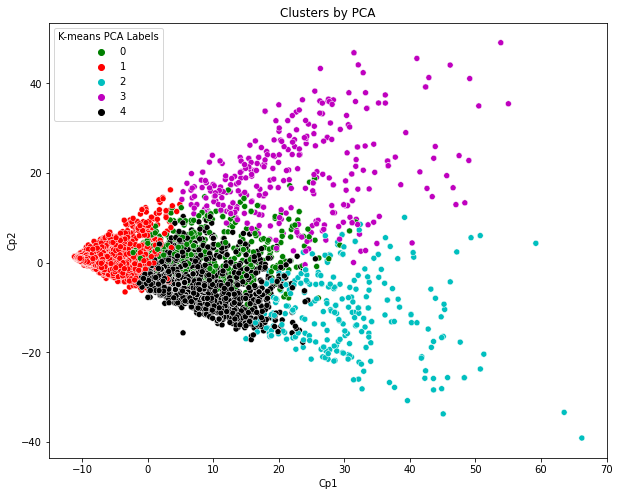

In [46]:
# Plot data by the first 2 components
x_axis = X_kmeans_pca['Cp1']
y_axis = X_kmeans_pca['Cp2']
plt.figure(figsize = (10, 8))
import seaborn as sns
sns.scatterplot(x_axis, y_axis, hue = X_kmeans_pca['K-means PCA Labels'], palette = ['g', 'r', 'c', 'm', 'k'])
plt.title('Clusters by PCA')
plt.show()

In [47]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_score(scores_pca, kmeans_pca.labels_, metric='euclidean')

0.31553689798258444

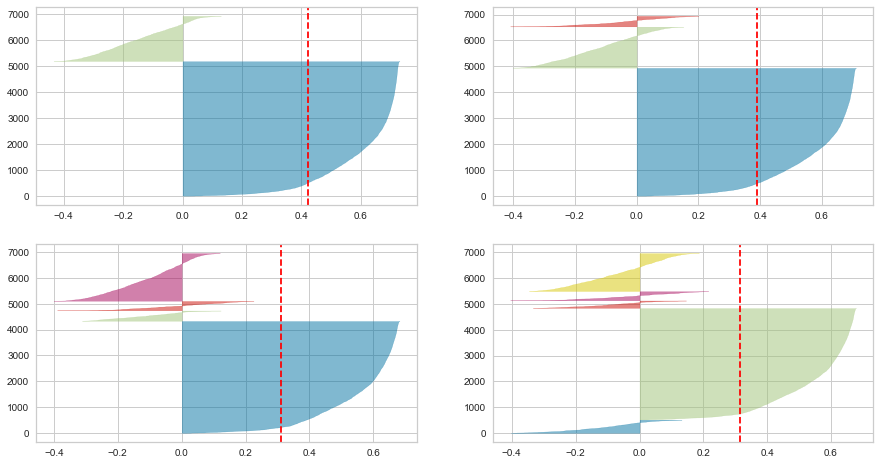

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scores_pca)

# Criteria:
# - Below average silhouette scores
# - Wide fluctuations in the size of the silhouette plots
# - Thickness of the silhouette plot

In [49]:
X_scaler_df_TOT = X_scaler_df.filter(regex='^TOT', axis=1)
X_scaler_df_TOT.shape

(6918, 77)

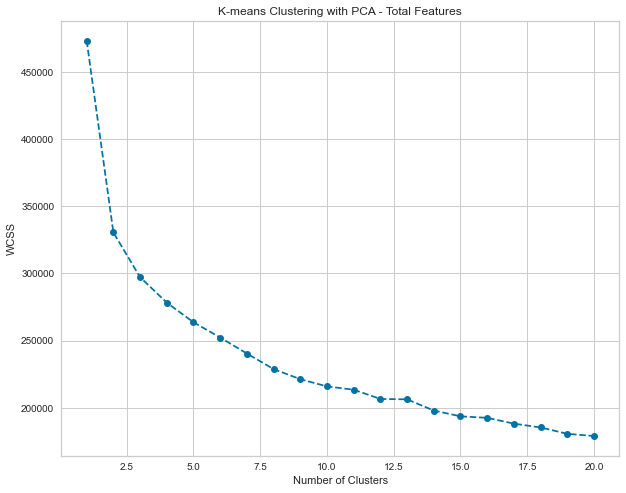

In [50]:
wcss = []

for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(X_scaler_df_TOT)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('K-means Clustering with PCA - Total Features')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

i=2, score=0.4851177758130942
i=3, score=0.38652013387204015
i=4, score=0.38806190624549197
i=5, score=0.3830815569195191
i=6, score=0.31312353827635414
i=7, score=0.3151608796836426
i=8, score=0.3163337830303138
i=9, score=0.32095543948749833
i=10, score=0.24541640385883756
i=11, score=0.26047883042130177
i=12, score=0.24528117033258715
i=13, score=0.24472934844734157
i=14, score=0.24107666619908963
i=15, score=0.2334940840896548
i=16, score=0.228520555394095
i=17, score=0.2320199993722786


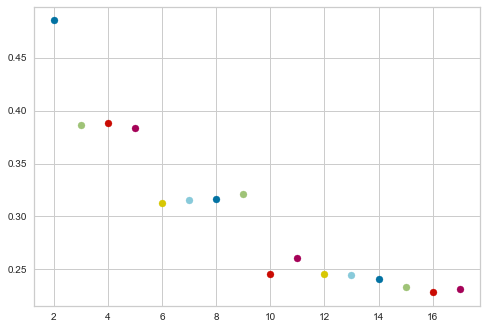

In [51]:
for i in range(2,18):
    km = KMeans(i, random_state=42)
    km.fit(X_scaler_df_TOT)
    score = silhouette_score(X_scaler_df_TOT, km.labels_, metric = 'euclidean')
    plt.scatter(i, score)
    print(f'{i=}, {score=}')

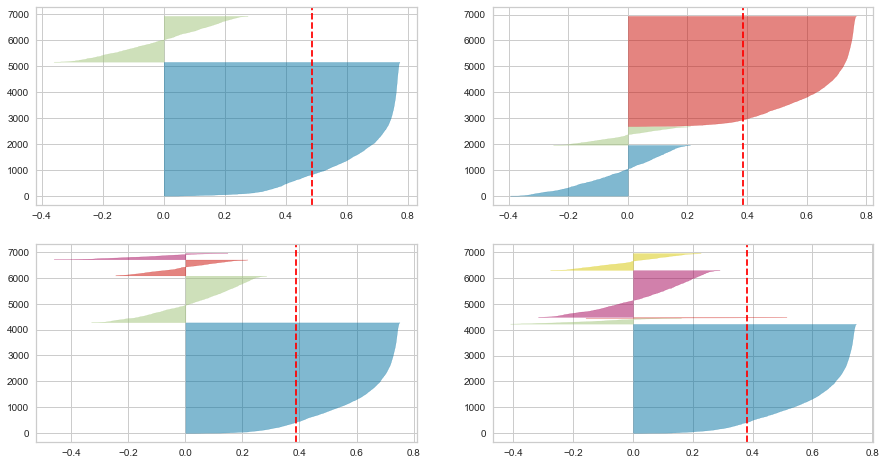

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaler_df_TOT)

In [53]:
kmeans_TOT = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_TOT_labels = kmeans_TOT.fit(X_scaler_df_TOT)
silhouette_score(X_scaler_df_TOT, kmeans_TOT.labels_, metric='euclidean')

0.3830815569195191

In [54]:
X_scaler_df_TOT.corr()

TOT_MATHENR_ADVM_M  TOT_MATHENR_ADVM_F  \
TOT_MATHENR_ADVM_M                    1.000000            0.978714   
TOT_MATHENR_ADVM_F                    0.978714            1.000000   
TOT_APENR_M                           0.764970            0.755395   
TOT_APENR_F                           0.769992            0.777250   
TOT_APMATHENR_M                       0.691781            0.679506   
...                                        ...                 ...   
TOT_SSPART                            0.699852            0.702910   
TOT_DISCWODIS_TFRALT_M                0.190461            0.190303   
TOT_DISCWODIS_TFRALT_F                0.159931            0.164326   
TOT_DISCWDIS_TFRALT_IDEA_M            0.149848            0.156137   
TOT_DISCWDIS_TFRALT_IDEA_F            0.131386            0.139893   

                            TOT_APENR_M  TOT_APENR_F  TOT_APMATHENR_M  \
TOT_MATHENR_ADVM_M             0.764970     0.769992         0.691781   
TOT_MATHENR_ADVM_F             0.755395     0.777250         0.679506   
TOT_APENR_M                    1.000000     0.978775         0.858663   
TOT_APENR_F                    0.978775     1.000000         0.819120   
TOT_APMATHENR_M                0.858663     0.819120         1.000000   
...                                 ...          ...              ...   
TOT_SSPART                     0.726166     0.732693         0.670972   
TOT_DISCWODIS_TFRALT_M         0.172616     0.188133         0.091809   
TOT_DISCWODIS_TFRALT_F         0.150346     0.163319         0.079748   
TOT_DISCWDIS_TFRALT_IDEA_M     0.142316     0.157430         0.081338   
TOT_DISCWDIS_TFRALT_IDEA_F     0.136744     0.148472         0.105294   

                            TOT_APMATHENR_F  TOT_APSCIENR_M  TOT_APSCIENR_F  \
TOT_MATHENR_ADVM_M                 0.683486        0.668550        0.667287   
TOT_MATHENR_ADVM_F                 0.687383        0.655237        0.668108   
TOT_APENR_M                        0.836089        0.892133        0.871983   
TOT_APENR_F                        0.824210        0.858261        0.870710   
TOT_APMATHENR_M                    0.961523        0.822164        0.775005   
...                                     ...             ...             ...   
TOT_SSPART                         0.662645        0.625894        0.625547   
TOT_DISCWODIS_TFRALT_M             0.099998        0.143586        0.159412   
TOT_DISCWODIS_TFRALT_F             0.086662        0.123682        0.139583   
TOT_DISCWDIS_TFRALT_IDEA_M         0.093496        0.125423        0.136639   
TOT_DISCWDIS_TFRALT_IDEA_F         0.111241        0.137589        0.144945   

                            TOT_APOTHENR_M  TOT_APOTHENR_F  ...  \
TOT_MATHENR_ADVM_M                0.748651        0.758089  ...   
TOT_MATHENR_ADVM_F                0.738540        0.764171  ...   
TOT_APENR_M                       0.986851        0.966197  ...   
TOT_APENR_F                       0.969531        0.989986  ...   
TOT_APMATHENR_M                   0.826200        0.797669  ...   
...                                    ...             ...  ...   
TOT_SSPART                        0.694577        0.708202  ...   
TOT_DISCWODIS_TFRALT_M            0.174166        0.188011  ...   
TOT_DISCWODIS_TFRALT_F            0.151597        0.163488  ...   
TOT_DISCWDIS_TFRALT_IDEA_M        0.145804        0.159882  ...   
TOT_DISCWDIS_TFRALT_IDEA_F        0.135653        0.147754  ...   

                            TOT_RET_G12_F  TOT_SATACT_M  TOT_SATACT_F  \
TOT_MATHENR_ADVM_M               0.197706      0.693936      0.704809   
TOT_MATHENR_ADVM_F               0.195250      0.692546      0.718216   
TOT_APENR_M                      0.179845      0.732355      0.737287   
TOT_APENR_F                      0.188061      0.744853      0.766970   
TOT_APMATHENR_M                  0.111253      0.641697      0.632004   
...                                   ...           ...           ...   
TOT_SSPART                       0.150979    

In [55]:
corr_matrix = X_scaler_df_TOT.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
tot_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
tot_to_drop

/var/folders/07/lc6xyqmx2szbq9t8c_f7m2pm0000gn/T/ipykernel_14155/971985915.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['TOT_MATHENR_ADVM_F',
 'TOT_APENR_F',
 'TOT_APMATHENR_M',
 'TOT_APMATHENR_F',
 'TOT_APSCIENR_M',
 'TOT_APSCIENR_F',
 'TOT_APOTHENR_M',
 'TOT_APOTHENR_F',
 'TOT_APEXAM_ONEORMORE_M',
 'TOT_APEXAM_ONEORMORE_F',
 'TOT_APEXAM_NONE_F',
 'TOT_ALGENR_GS0910_F',
 'TOT_ALGENR_GS1112_F',
 'TOT_ALGPASS_GS0910_M',
 'TOT_ALGPASS_GS0910_F',
 'TOT_ALGPASS_GS1112_M',
 'TOT_ALGPASS_GS1112_F',
 'TOT_MATHENR_ALG2_F',
 'TOT_SCIENR_BIOL_M',
 'TOT_SCIENR_BIOL_F',
 'TOT_MATHENR_CALC_F',
 'TOT_SCIENR_CHEM_M',
 'TOT_SCIENR_CHEM_F',
 'TOT_DUAL_F',
 'TOT_ENR_M',
 'TOT_ENR_F',
 'TOT_LEPENR_F',
 'TOT_LEPPROGENR_M',
 'TOT_LEPPROGENR_F',
 'TOT_IDEAENR_M',
 'TOT_IDEAENR_F',
 'TOT_504ENR_F',
 'TOT_DISCWODIS_EXPWE_F',
 'TOT_DISCWODIS_EXPZT_F',
 'TOT_MATHENR_GEOM_M',
 'TOT_MATHENR_GEOM_F',
 'TOT_GTENR_F',
 'TOT_SCIENR_PHYS_M',
 'TOT_SCIENR_PHYS_F',
 'TOT_RET_G09_F',
 'TOT_RET_G10_M',
 'TOT_RET_G10_F',
 'TOT_RET_G11_M',
 'TOT_RET_G11_F',
 'TOT_RET_G12_F',
 'TOT_SATACT_F',
 'TOT_DISCWODIS_TFRALT_M',
 'TOT_DISCWODIS_TFRALT

In [56]:
X_scaler_df_TOTdrop = X_scaler_df_TOT.drop(X_scaler_df_TOT[tot_to_drop], axis=1)
X_scaler_df_TOTdrop.shape

(6918, 29)

In [57]:
X_scaler_df_TOTdrop.head()

TOT_MATHENR_ADVM_M  TOT_APENR_M  TOT_APEXAM_NONE_M  TOT_ALGENR_GS0910_M  \
0           -0.008539    -0.728683          -0.675462            -0.124297   
1            0.369547    -0.279429          -0.567706             0.715744   
2           -0.553427    -0.682996          -0.675462            -0.742661   
3            0.436268    -0.157598          -0.503053             0.377394   
4            0.747633    -0.728683          -0.675462             1.439112   

   TOT_ALGENR_GS1112_M  TOT_MATHENR_ALG2_M  TOT_MATHENR_CALC_M  TOT_DUAL_M  \
0             -0.13965            0.433714           -0.405851   -0.161690   
1             -0.13965            1.104261           -0.195917   -0.052765   
2             -0.32889           -0.582584           -0.499769   -0.434004   
3             -0.07657            0.758511           -0.334032    0.260397   
4             -0.07657            0.884238           -0.665507   -0.434004   

   TOT_LEPENR_M  TOT_504ENR_M  ...  TOT_DISCWDIS_EXPZT_IDEA_F  TOT_GTENR_M  \
0     -0.251687     -0.533439  ...                  -0.093232    -0.272758   
1     -0.284261     -0.601280  ...                  -0.093232     0.980233   
2     -0.479708     -0.295994  ...                  -0.093232    -0.233602   
3     -0.235399     -0.024629  ...                  -0.093232     0.888869   
4     -0.251687     -0.363835  ...                  -0.093232    -0.129187   

   TOT_RET_G09_M  TOT_RET_G12_M  TOT_SATACT_M  TOT_SSSPORTS  TOT_SSTEAMS  \
0       1.348595      -0.165364      0.177795     -1.544008    -0.716607   
1      -0.201115      -0.364448      0.589312     -0.481863    -0.304475   
2      -0.670724      -0.364448     -0.586452     -0.614631    -0.510541   
3       0.550260      -0.115593      0.572515     -0.481863    -0.304475   
4       1.442517      -0.065822      0.421346     -1.012936    -0.428115   

   TOT_SSPART  TOT_DISCWDIS_TFRALT_IDEA_M  TOT_DISCWDIS_TFRALT_IDEA_F  
0   -0.196022                   -0.265758                   -0.191704  
1    1.159536                   -0.265758                   -0.191704  
2   -0.759562                   -0.265758                   -0.191704  
3    1.159536                   -0.265758                   -0.191704  
4    0.533381                   -0.265758                   -0.191704  

[5 rows x 29 columns]

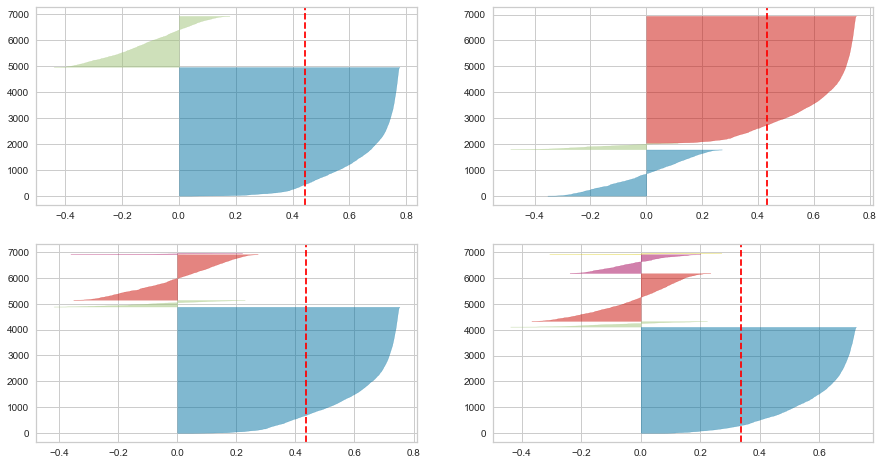

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaler_df_TOTdrop)

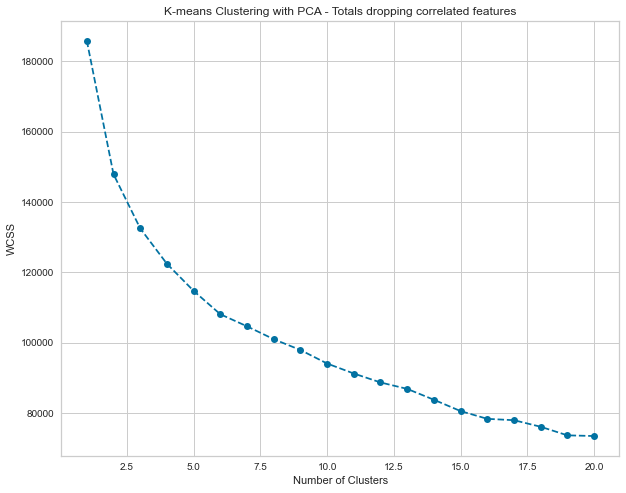

In [59]:
wcss = []

for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(X_scaler_df_TOTdrop)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('K-means Clustering with PCA - Totals dropping correlated features')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

i=2, score=0.4429420096461027
i=3, score=0.4324007719936981
i=4, score=0.43558973080568386
i=5, score=0.3386068757795907
i=6, score=0.3432412444038065
i=7, score=0.3282354149884691
i=8, score=0.3434172976142553
i=9, score=0.26758804828090227
i=10, score=0.2766084135131453
i=11, score=0.283340552050458
i=12, score=0.26083477384439396
i=13, score=0.33740996954978725
i=14, score=0.28985469125899266
i=15, score=0.2653746562937697
i=16, score=0.27520270404834657
i=17, score=0.2699056588298539


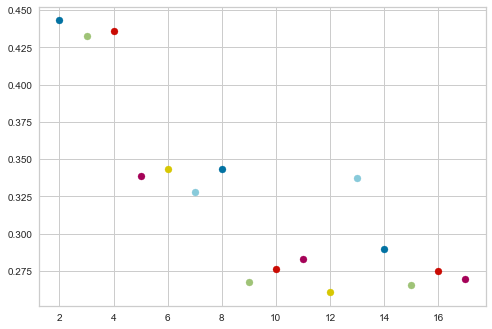

In [60]:
for i in range(2,18):
    km = KMeans(i, random_state=42)
    km.fit(X_scaler_df_TOTdrop)
    score = silhouette_score(X_scaler_df_TOTdrop, km.labels_, metric = 'euclidean')
    plt.scatter(i, score)
    print(f'{i=}, {score=}')

In [61]:
kmeans_TOTCorr = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_TOT_labelsCorr = kmeans_TOTCorr.fit(X_scaler_df_TOTdrop)
silhouette_score(X_scaler_df_TOTdrop, kmeans_TOTCorr.labels_, metric='euclidean')

0.3386068757795907

In [62]:
high_schools_df1 = high_schools[['TOT_APENR_M', 'TOT_APENR_F', 'TOT_APEXAM_ONEORMORE_M', 'TOT_APEXAM_ONEORMORE_F', 'SCH_CORPINSTANCES_IND', 'SCH_CREDITRECOVERYENR', 'TOT_DUAL_F', 'TOT_DUAL_M', 'TOT_ENR_F', 'TOT_ENR_M', 'TOT_LEPPROGENR_F', 'TOT_LEPPROGENR_M', 'TOT_DISCWODIS_EXPWE_F', 'TOT_DISCWODIS_EXPWE_M', 'TOT_DISCWODIS_EXPZT_M', 'TOT_DISCWODIS_EXPZT_F', 'TOT_GTENR_F', 'TOT_GTENR_M', 'TOT_RET_G11_F', 'TOT_RET_G11_M', 'TOT_RET_G12_F', 'TOT_RET_G12_M', 'TOT_SATACT_F', 'TOT_SATACT_M', 'SCH_OFFENSE_THRWW', 'SCH_OFFENSE_THRWX', 'SCH_OFFENSE_ATTWW', 'SCH_OFFENSE_ATTWX', 'SCH_OFFENSE_ROBWW', 'SCH_OFFENSE_ATTWOW', 'SCH_OFFENSE_BATT', 'SCH_OFFENSE_POSSWX', 'SCH_OFFENSE_RAPE', 'SCH_OFFENSE_ROBWOW', 'SCH_OFFENSE_ROBWX', 'SCH_OFFENSE_THRWOW', 'SCH_SAL_TEACH_WFED', 'SCH_SAL_AID_WFED', 'SCH_SAL_SUP_WFED', 'SCH_SAL_ADM_WFED', 'SCH_SAL_TOTPERS_WFED', 'SCH_FTE_ADM_WFED', 'SCH_FTE_AID_WFED', 'SCH_FTE_SUP_WFED', 'SCH_NPE_WFED', 'SCH_FTETEACH_TOT', 'SCH_FTECOUNSELORS', 'SCH_FTESECURITY_LEO', 'SCH_FTESECURITY_GUA', 'SCH_FTESERVICES_NUR', 'SCH_FTESERVICES_SOC', 'TOT_DISCWODIS_TFRALT_F', 'TOT_DISCWODIS_TFRALT_M']]

In [63]:
column_offenses = ['SCH_OFFENSE_THRWW', 'SCH_OFFENSE_THRWX', 'SCH_OFFENSE_ATTWW', 'SCH_OFFENSE_ATTWX', 'SCH_OFFENSE_ROBWW', 'SCH_OFFENSE_ATTWOW', 'SCH_OFFENSE_BATT', 'SCH_OFFENSE_POSSWX', 'SCH_OFFENSE_RAPE', 'SCH_OFFENSE_ROBWOW', 'SCH_OFFENSE_ROBWX', 'SCH_OFFENSE_THRWOW']

high_schools_df1['SCH_OFFENSES']=high_schools_df1[column_offenses].sum(axis=1)

column_othersSupport = ['SCH_FTECOUNSELORS', 'SCH_FTESECURITY_LEO', 'SCH_FTESECURITY_GUA', 'SCH_FTESERVICES_NUR', 'SCH_FTESERVICES_SOC']

high_schools_df1['SCH_FTEOTHERS']=high_schools_df1[column_othersSupport].sum(axis=1)

/var/folders/07/lc6xyqmx2szbq9t8c_f7m2pm0000gn/T/ipykernel_14155/1900721944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_schools_df1['SCH_OFFENSES']=high_schools_df1[column_offenses].sum(axis=1)
/var/folders/07/lc6xyqmx2szbq9t8c_f7m2pm0000gn/T/ipykernel_14155/1900721944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_schools_df1['SCH_FTEOTHERS']=high_schools_df1[column_othersSupport].sum(axis=1)


In [64]:
high_schools_df1 = high_schools_df1.drop(['SCH_OFFENSE_THRWW', 'SCH_OFFENSE_THRWX', 'SCH_OFFENSE_ATTWW', 'SCH_OFFENSE_ATTWX', 'SCH_OFFENSE_ROBWW', 'SCH_OFFENSE_ATTWOW', 'SCH_OFFENSE_BATT', 'SCH_OFFENSE_POSSWX', 'SCH_OFFENSE_RAPE', 'SCH_OFFENSE_ROBWOW', 'SCH_OFFENSE_ROBWX', 'SCH_OFFENSE_THRWOW', 'SCH_FTECOUNSELORS', 'SCH_FTESECURITY_LEO', 'SCH_FTESECURITY_GUA', 'SCH_FTESERVICES_NUR', 'SCH_FTESERVICES_SOC'], axis=1)

high_schools_df1.columns

Index(['TOT_APENR_M', 'TOT_APENR_F', 'TOT_APEXAM_ONEORMORE_M',
       'TOT_APEXAM_ONEORMORE_F', 'SCH_CORPINSTANCES_IND',
       'SCH_CREDITRECOVERYENR', 'TOT_DUAL_F', 'TOT_DUAL_M', 'TOT_ENR_F',
       'TOT_ENR_M', 'TOT_LEPPROGENR_F', 'TOT_LEPPROGENR_M',
       'TOT_DISCWODIS_EXPWE_F', 'TOT_DISCWODIS_EXPWE_M',
       'TOT_DISCWODIS_EXPZT_M', 'TOT_DISCWODIS_EXPZT_F', 'TOT_GTENR_F',
       'TOT_GTENR_M', 'TOT_RET_G11_F', 'TOT_RET_G11_M', 'TOT_RET_G12_F',
       'TOT_RET_G12_M', 'TOT_SATACT_F', 'TOT_SATACT_M', 'SCH_SAL_TEACH_WFED',
       'SCH_SAL_AID_WFED', 'SCH_SAL_SUP_WFED', 'SCH_SAL_ADM_WFED',
       'SCH_SAL_TOTPERS_WFED', 'SCH_FTE_ADM_WFED', 'SCH_FTE_AID_WFED',
       'SCH_FTE_SUP_WFED', 'SCH_NPE_WFED', 'SCH_FTETEACH_TOT',
       'TOT_DISCWODIS_TFRALT_F', 'TOT_DISCWODIS_TFRALT_M', 'SCH_OFFENSES',
       'SCH_FTEOTHERS'],
      dtype='object')

In [65]:
X1 = high_schools_df1.iloc[:,:]
X_scaler1 = scaler.fit_transform(X1)
X_scaler1 = KNNImputer().fit_transform(X_scaler1)

In [66]:
X_scaler1_df = pd.DataFrame(X_scaler1)
X_scaler1_df.corr()

0         1         2         3         4         5         6   \
0   1.000000  0.978471  0.956236  0.937762 -0.167026  0.342422  0.403025   
1   0.978471  1.000000  0.934977  0.956987 -0.173630  0.358329  0.406636   
2   0.956236  0.934977  1.000000  0.976196 -0.164236  0.303153  0.361275   
3   0.937762  0.956987  0.976196  1.000000 -0.172119  0.321193  0.362088   
4  -0.167026 -0.173630 -0.164236 -0.172119  1.000000 -0.109691 -0.103537   
5   0.342422  0.358329  0.303153  0.321193 -0.109691  1.000000  0.292240   
6   0.403025  0.406636  0.361275  0.362088 -0.103537  0.292240  1.000000   
7   0.364974  0.353217  0.325049  0.309569 -0.095182  0.260436  0.938837   
8   0.787884  0.821547  0.745939  0.778065 -0.180701  0.525483  0.458793   
9   0.796824  0.817383  0.751651  0.771552 -0.178571  0.525287  0.455245   
10  0.358205  0.380542  0.316583  0.343039 -0.098464  0.426884  0.208065   
11  0.376330  0.395852  0.330763  0.355013 -0.098559  0.443101  0.230082   
12  0.153849  0.168301  0.139357  0.151686 -0.046625  0.174011  0.091722   
13  0.174157  0.191903  0.155279  0.169614 -0.035752  0.195499  0.097305   
14  0.067789  0.072578  0.064677  0.073108 -0.000419  0.067071  0.024809   
15  0.036164  0.039133  0.034701  0.039229  0.003422  0.035174  0.003970   
16  0.629508  0.646816  0.619721  0.633137 -0.142974  0.280026  0.334548   
17  0.699988  0.694924  0.690909  0.681785 -0.148424  0.290122  0.346301   
18  0.209615  0.227360  0.198452  0.213378 -0.092954  0.304145  0.169539   
19  0.290793  0.311341  0.277145  0.295676 -0.109757  0.335893  0.202504   
20  0.181411  0.189327  0.152239  0.164391 -0.066141  0.198191  0.069042   
21  0.243041  0.250584  0.206619  0.218990 -0.092560  0.250562  0.103099   
22  0.740075  0.769968  0.728838  0.756361 -0.173173  0.410164  0.409639   
23  0.735516  0.747929  0.724966  0.735836 -0.174122  0.394414  0.404371   
24  0.085126  0.088020  0.081464  0.085937 -0.021854  0.042766  0.036014   
25  0.130527  0.130825  0.122863  0.119204 -0.035191  0.088506  0.073663   
26  0.066780  0.071922  0.061048  0.069083 -0.023554  0.082790  0.081687   
27  0.166605  0.171552  0.150883  0.154194 -0.025862  0.126187  0.098959   
28  0.335147  0.341705  0.312387  0.319863 -0.076384  0.201190  0.185645   
29  0.016843  0.012974 -0.008319 -0.008819 -0.004281  0.000640 -0.002743   
30  0.041897  0.041658  0.034733  0.031565 -0.006554 -0.010427  0.006643   
31  0.018086  0.014250 -0.007374 -0.007838 -0.003952  0.001052 -0.001894   
32  0.049600  0.054862  0.045760  0.049856  0.020536  0.066795  0.024832   
33  0.757522  0.781640  0.707636  0.732811 -0.160938  0.505982  0.431750   
34  0.152212  0.165603  0.136530  0.150823 -0.048543  0.178511  0.088745   
35  0.176035  0.192158  0.158016  0.174100 -0.037497  0.204967  0.089672   
36  0.149166  0.167838  0.118508  0.135834 -0.085233  0.276024  0.156514   
37  0.023135  0.036292  0.033113  0.048360 -0.006237  0.058876  0.010213   

          7         8         9   ...        28        29        30        31  \
0   0.364974  0.787884  0.796824  ...  0.335147  0.016843  0.041897  0.018086   
1   0.353217  0.821547  0.817383  ...  0.341705  0.012974  0.041658  0.014250   
2   0.325049  0.745939  0.751651  ...  0.312387 -0.008319  0.034733 -0.007374   
3   0.309569  0.778065  0.771552  ...  0.319863 -0.008819  0.031565 -0.007838   
4  -0.095182 -0.180701 -0.178571  ... -0.076384 -0.004281 -0.006554 -0.003952   
5   0.260436  0.525483  0.525287  ...  0.201190  0.000640 -0.010427  0.001052   
6   0.938837  0.458793  0.455245  ...  0.185645 -0.002743  0.006643 -0.001894   
7   1.000000  0.378888  0.386773  ...  0.158694 -0.000732  0.007092 -0.000075   
8   0.378888  1.000000  0.988088  ...  0.393653  0.010309  0.019619  0.011895   
9   0.386773  0.988088  1.000000  ...  0.397679  0.013194  0.020070  0.014648   
10  0.178787  0.495457  0.511301  ...  0.205451  0.001443 -0.006104  0.002205   
11  0.203708  0.505862  0.531718  ...  0.213003  0.004518 -0.006682  0.00

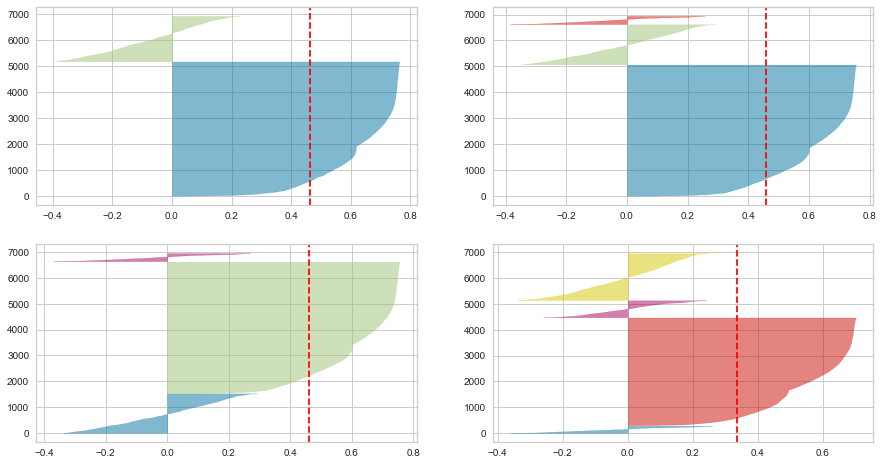

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaler1)

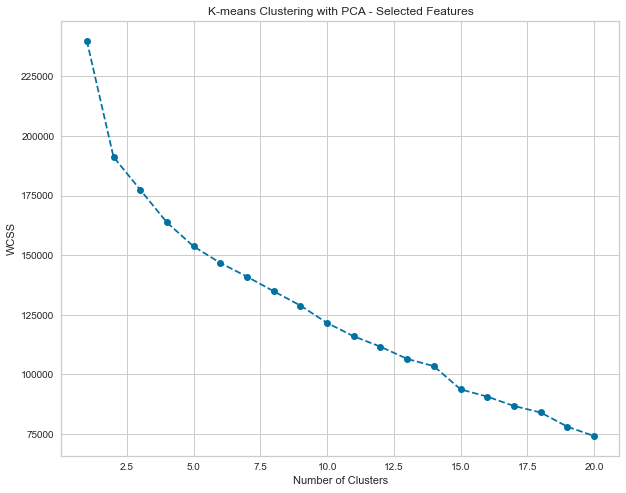

In [68]:
wcss = []

for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(X_scaler1)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('K-means Clustering with PCA - Selected Features')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

i=2, score=0.4634852852250334
i=3, score=0.45709944905305855
i=4, score=0.46042031035258424
i=5, score=0.33651930038868144
i=6, score=0.33674942431225635
i=7, score=0.33594232993957307
i=8, score=0.31366785009341513
i=9, score=0.3329268645596751
i=10, score=0.3247767768280631
i=11, score=0.3265666503513409
i=12, score=0.33480954443867816
i=13, score=0.3176839740325256
i=14, score=0.3364243572365298
i=15, score=0.3358650637783939
i=16, score=0.3240723835629518
i=17, score=0.3232629551663656


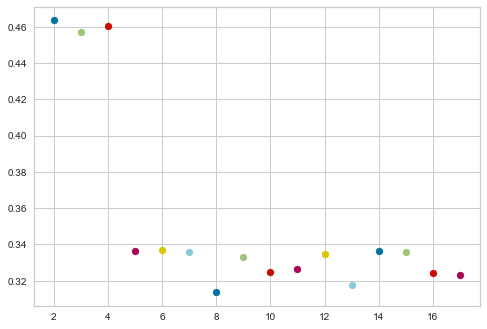

In [69]:
for i in range(2,18):
    km = KMeans(i, random_state=42)
    km.fit(X_scaler1)
    score = silhouette_score(X_scaler1, km.labels_, metric = 'euclidean')
    plt.scatter(i, score)
    print(f'{i=}, {score=}')

In [70]:
kmeans_Sel = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_Sel_Labels = kmeans_Sel.fit(X_scaler1)
silhouette_score(X_scaler1, kmeans_Sel.labels_, metric='euclidean')

0.33651930038868144

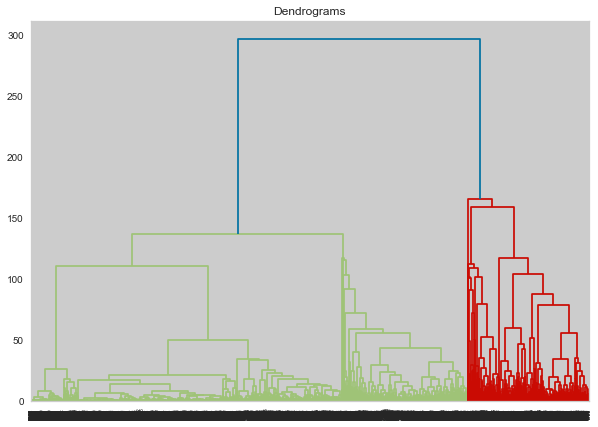

In [71]:
#Determine the largest vertical distance that does not intersect any clusters, so we can get the optimal number of clusters.

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_scaler1, method='ward'))

i=2, score=0.469668080614667
i=3, score=0.46881963869357407
i=4, score=0.45188516089582487
i=5, score=0.26782469744729476
i=6, score=0.26541300275770724
i=7, score=0.2673459876095343
i=8, score=0.2641660447338884
i=9, score=0.26481723793191086
i=10, score=0.28773032004274773
i=11, score=0.2935392377890601
i=12, score=0.30087061517825103
i=13, score=0.30245317064523186
i=14, score=0.3038139333889172
i=15, score=0.3041563671291437
i=16, score=0.30454001365277117
i=17, score=0.3049120709748276
i=18, score=0.3070627305410865
i=19, score=0.3130831784036168
i=20, score=0.3152707977995285
i=21, score=0.31486496740341224
i=22, score=0.3161403057285526
i=23, score=0.32003797637533443
i=24, score=0.3214121128664444
i=25, score=0.32262016195921633
i=26, score=0.31849908903980123
i=27, score=0.3196646947808647
i=28, score=0.3219562425560069
i=29, score=0.3234661181553915
i=30, score=0.19847794259724505
i=31, score=0.19893364106570396
i=32, score=0.19963693406517788
i=33, score=0.20132032663367247


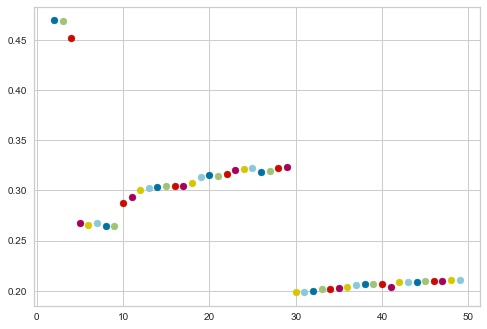

In [72]:
from sklearn.cluster import AgglomerativeClustering

for i in range(2,50):
    ac = AgglomerativeClustering(i, affinity='euclidean', linkage='ward')
    ac.fit(X_scaler1)
    score = silhouette_score(X_scaler1, ac.labels_, metric = 'euclidean')
    plt.scatter(i, score)
    print(f'{i=}, {score=}')

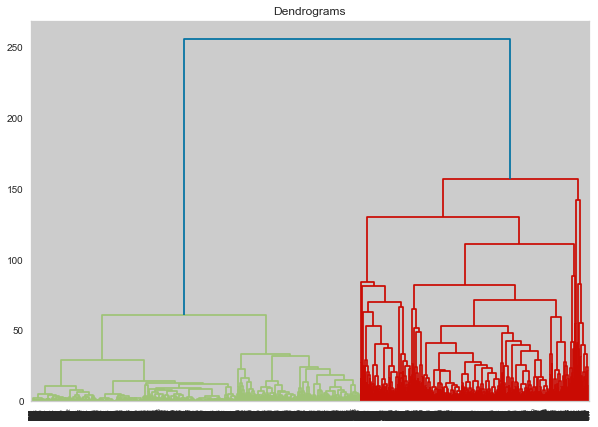

In [73]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_scaler_df_TOTdrop, method='ward'))

i=2, score=0.35527414638754906
i=3, score=0.3606450309029451
i=4, score=0.36430716932950624
i=5, score=0.3480141055132844
i=6, score=0.34549758987464585
i=7, score=0.3466550644813553
i=8, score=0.34979235528438407
i=9, score=0.3518054990974366
i=10, score=0.34758414389968917
i=11, score=0.3489673684465858
i=12, score=0.3404217286472633
i=13, score=0.3441515966404609
i=14, score=0.34618674631480273
i=15, score=0.34713959794773447
i=16, score=0.3496166155302554
i=17, score=0.15332092446665307
i=18, score=0.15530052630879035
i=19, score=0.1559104164451528
i=20, score=0.15598868034992328
i=21, score=0.15622437648235377
i=22, score=0.15500810351560632
i=23, score=0.15882668889697377
i=24, score=0.16077503431680124
i=25, score=0.16256868431982058
i=26, score=0.16553209439688218
i=27, score=0.1682033510127227
i=28, score=0.16987722247283427
i=29, score=0.17076822815894405
i=30, score=0.17114310743820932
i=31, score=0.17269604530604038
i=32, score=0.1733173243735376
i=33, score=0.1742685697779

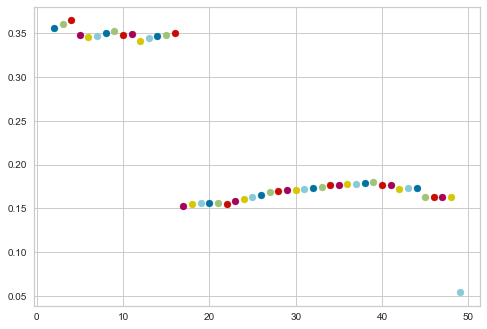

In [74]:
for i in range(2,50):
    ac = AgglomerativeClustering(i, affinity='euclidean', linkage='ward')
    ac.fit(X_scaler_df_TOTdrop)
    score = silhouette_score(X_scaler_df_TOTdrop, ac.labels_, metric = 'euclidean')
    plt.scatter(i, score)
    print(f'{i=}, {score=}')

In [75]:
#We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.
#After that, we can select the eps to apply to DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_scaler1)
distances, indices = nbrs.kneighbors(X_scaler1)

(0.0, 10.0)

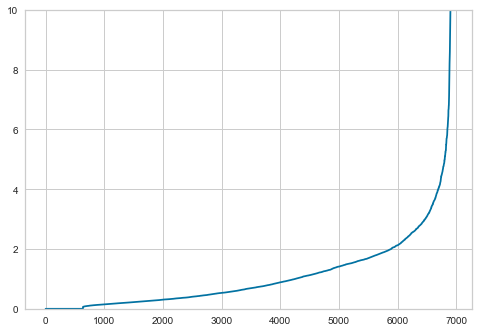

In [76]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim(0, 10)

In [77]:
from sklearn.cluster import DBSCAN

bs = DBSCAN(eps=3, min_samples=5)
bs.fit(X_scaler1)
score = silhouette_score(X_scaler1, bs.labels_, metric = 'euclidean')
score

0.1298713100163447

In [78]:
clusters = bs.labels_
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
# Python 3 program to count frequencies
# of array items
def countFreq(arr, n):

   # Mark all array elements as not visited
   visited = [False for i in range(n)]

   # Traverse through array elements
   # and count frequencies
   for i in range(n):

     # Skip this element if already
     # processed
     if (visited[i] == True):
        continue

     # Count frequency
     count = 1
     for j in range(i + 1, n, 1):
        if (arr[i] == arr[j]):
          visited[j] = True
          count += 1

     print(arr[i], count)

# Driver Code
n = len(clusters)
countFreq(clusters, n)

0 5634
-1 648
1 573
2 5
5 5
3 4
4 6
6 5
7 8
8 7
9 7
10 8
11 8


<AxesSubplot:title={'center':'DBSCAN clustering'}>

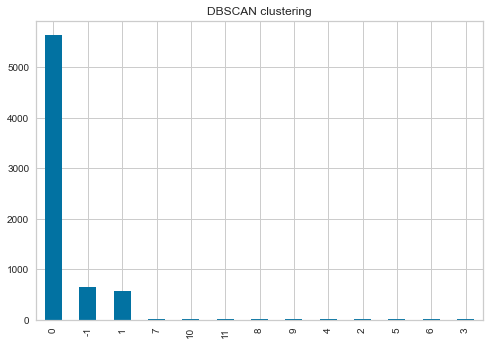

In [80]:
resultDB = pd.DataFrame(clusters)
resultDB.iloc[:,0].value_counts().plot.bar(title = "DBSCAN clustering")

In [81]:
nbrs_tot = neigh.fit(X_scaler_df_TOTdrop)
distances_tot, indices_tot = nbrs_tot.kneighbors(X_scaler_df_TOTdrop)

(0.0, 10.0)

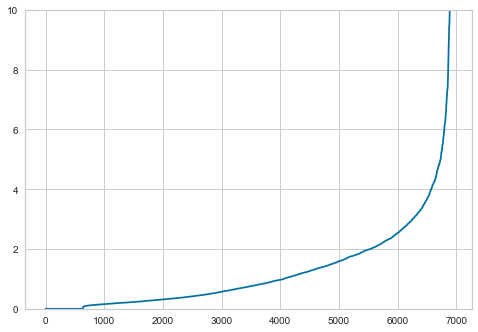

In [82]:
distances_tot = np.sort(distances_tot, axis=0)
distances_tot = distances_tot[:,1]
plt.plot(distances_tot)
plt.ylim(0, 10)

In [83]:
#bs = DBSCAN(eps=3, min_samples=5)
#The same eps of 3 appears to be fine
bs.fit(X_scaler_df_TOTdrop)
score_tot = silhouette_score(X_scaler_df_TOTdrop, bs.labels_, metric = 'euclidean')
score_tot

0.31561145560084686

In [84]:
clusters_tot = bs.labels_
clusters_tot

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
n = len(clusters_tot)
countFreq(clusters_tot, n)

0 5986
-1 878
1 11
2 7
3 5
4 6
5 5
6 5
7 7
8 8


<AxesSubplot:title={'center':'DBSCAN clustering'}>

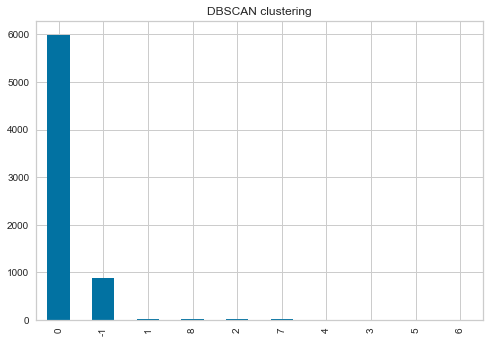

In [86]:
resultDB_tot = pd.DataFrame(clusters_tot)
resultDB_tot.iloc[:,0].value_counts().plot.bar(title = "DBSCAN clustering")

In [87]:
#threshold :  threshold is the maximum number of data points a sub-cluster in the leaf node of the CF tree can hold.
#branching_factor : This parameter specifies the maximum number of CF sub-clusters in each node (internal node).
#n_clusters : The number of clusters to be returned after the entire BIRCH algorithm is complete i.e., number of clusters after the final clustering step. If set to None, the final clustering step is not performed and intermediate clusters are returned.

#from sklearn.cluster import Birch
#BM = Birch(n_clusters=3, compute_labels=True)

#search_space = {
#    "threshold" : [0.01, 0.05, 0.10, 0.30, 0.50, 0.90],
#    "Branch" : [10, 30, 50, 70, 100]
#}

#from sklearn.model_selection import GridSearchCV
#GS = GridSearchCV(estimator = BM,
#                  param_grid= search_space,
#                  scoring= silhouette_score(X_scaler1, labels=BM.labels_, metric="euclidean", random_state=42),
#                  cv=None)

#GS.fit(X_scaler1)

In [88]:
from sklearn.cluster import Birch
BM = Birch(branching_factor=100, threshold=0.001, n_clusters=5, compute_labels=True)

In [89]:
BM.fit(X_scaler1)

labelsBM = BM.predict(X_scaler1)

<AxesSubplot:title={'center':'BIRCH clustering'}>

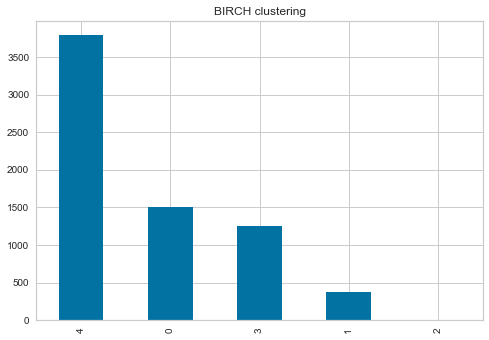

In [90]:
resultBM = pd.DataFrame(labelsBM)
resultBM.iloc[:,0].value_counts().plot.bar(title = "BIRCH clustering")

In [91]:
scoreBM = silhouette_score(X_scaler1, BM.labels_, metric = 'euclidean')
scoreBM

0.25323208047162576

<AxesSubplot:title={'center':'BIRCH clustering'}>

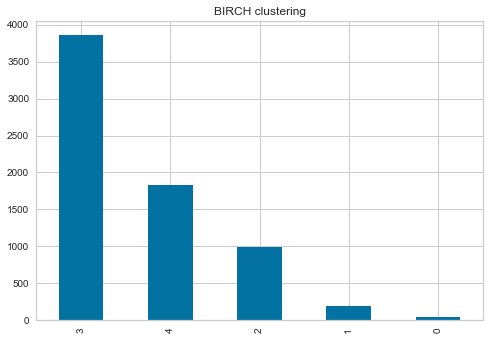

In [92]:
BM2 = Birch(branching_factor=100, threshold=0.001, n_clusters=5, compute_labels=True)

BM2.fit(X_scaler_df_TOTdrop)

labelsBM2 = BM2.predict(X_scaler_df_TOTdrop)
resultBM2 = pd.DataFrame(labelsBM2)
resultBM2.iloc[:, 0].value_counts().plot.bar(title="BIRCH clustering")

In [93]:
scoreBM_tot = silhouette_score(X_scaler_df_TOTdrop, BM.labels_, metric = 'euclidean')
scoreBM_tot

0.2517296522345246

In [94]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaler_df_TOTdrop, y, test_size=.2, random_state=1)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.25, random_state=1)

In [95]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaler1, y, test_size=.2, random_state=1)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.25, random_state=1)

In [96]:
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

LRR = linear_model.Ridge()
LRL = linear_model.Lasso(random_state=0)

In [97]:
spaceLRR = {
    'solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha' : loguniform(1e-5, 100),
    'fit_intercept' : [True, False]
}

spaceLRL = {
    'alpha' : loguniform(1e-5, 100),
    'fit_intercept' : [True, False]
}

In [98]:
RSearch = RandomizedSearchCV(LRR, spaceLRR, n_iter=500, scoring='neg_mean_absolute_error', cv=5, random_state=0, n_jobs=-1)

RS_result_tot = RSearch.fit(X1_val, y1_val)
RS_result = RSearch.fit(X2_val,y2_val)

print('Best Score TOT: %s' % RS_result_tot.best_score_)
print('Best Hyperparameters TOT: %s' % RS_result_tot.best_params_)

print('Best Score: %s' % RS_result.best_score_)
print('Best Hyperparameters: %s' % RS_result.best_params_)

Best Score TOT: -1.7737401379336741
Best Hyperparameters TOT: {'alpha': 91.37040028818906, 'fit_intercept': True, 'solver': 'svd'}
Best Score: -1.7737401379336741
Best Hyperparameters: {'alpha': 91.37040028818906, 'fit_intercept': True, 'solver': 'svd'}


In [99]:
LSSearch = RandomizedSearchCV(LRL, spaceLRL, n_iter=10000, scoring='neg_mean_absolute_error', cv=5, random_state=0, n_jobs=-1)

LS_result_tot = LSSearch.fit(X1_val, y1_val)
LS_result = LSSearch.fit(X2_val,y2_val)

print('Best Score TOT: %s' % LS_result_tot.best_score_)
print('Best Hyperparameters TOT: %s' % LS_result_tot.best_params_)

print('Best Score: %s' % LS_result.best_score_)
print('Best Hyperparameters: %s' % LS_result.best_params_)

/Users/noadiazcastro/Documents/College/SchoolPerformance/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e+03, tolerance: 8.088e-01
  model = cd_fast.enet_coordinate_descent(
/Users/noadiazcastro/Documents/College/SchoolPerformance/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.341e+02, tolerance: 8.045e-01
  model = cd_fast.enet_coordinate_descent(
/Users/noadiazcastro/Documents/College/SchoolPerformance/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want 

Best Score TOT: -1.752730407714446
Best Hyperparameters TOT: {'alpha': 0.0495793145948442, 'fit_intercept': True}
Best Score: -1.752730407714446
Best Hyperparameters: {'alpha': 0.0495793145948442, 'fit_intercept': True}


/Users/noadiazcastro/Documents/College/SchoolPerformance/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+03, tolerance: 8.027e-01
  model = cd_fast.enet_coordinate_descent(
/Users/noadiazcastro/Documents/College/SchoolPerformance/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+02, tolerance: 4.401e+01
  model = cd_fast.enet_coordinate_descent(
/Users/noadiazcastro/Documents/College/SchoolPerformance/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want 

In [100]:
LR = linear_model.LinearRegression()
LR.fit(X1_train, y1_train)
pred_LR1 = LR.predict(X1_test)

print('Coefficients:', LR.coef_)
print("Residual sum of squares: %.2f"% np.mean((pred_LR1 - y1_test) ** 2))
print('Variance score: %.2f' % LR.score(X1_test, y1_test))

Coefficients: [-7.86264982e-02  7.78140218e-01 -8.27260254e-02 -1.45284146e-01
 -1.99705825e-02 -1.00558233e-01  3.44753593e-01  1.73576952e-01
 -5.44707620e-01  2.91679287e-01 -1.43678896e-01 -1.63651977e-01
 -2.01401851e-04  7.09099327e-02  1.19147952e-01 -1.40224348e-01
  5.59799425e-03  1.27916242e-01  4.46498686e-02 -4.89817291e-02
  1.45292543e-01 -3.70065361e-01 -1.70615319e-01 -1.65150275e-01
  3.41372351e-01 -2.37702172e-02  3.71839206e-01  5.53296242e-03
  7.76409592e-02]
Residual sum of squares: 5.92
Variance score: 0.24


In [101]:
from sklearn.model_selection import cross_val_score

print("Cross validation mean MSE score using LRR1 is %s" % (-1 * cross_val_score(LR,X1_train,y1_train,cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using LRR1 is %s" % (cross_val_score(LR,X1_train,y1_train,cv=5, scoring='r2').mean()))

Cross validation mean MSE score using LRR1 is 1.7400984414988128
Cross validation mean R2 score using LRR1 is 0.25464535003186983


In [102]:
LR.fit(X2_train, y2_train)
pred_LR2 = LR.predict(X2_test)

print('Coefficients:', LR.coef_)
print("Residual sum of squares: %.2f"% np.mean((pred_LR2 - y2_test) ** 2))
print('Variance score: %.2f' % LR.score(X2_test, y2_test))

Coefficients: [ 5.76456555e-01  2.03106539e-01  1.52521942e+00 -1.33912422e+00
  8.38264257e-02 -1.97988365e-01  2.21755747e-02  2.94694471e-01
  2.31498551e+00 -2.47387841e+00 -4.46279522e-01 -1.80616612e-01
  3.36373782e-03 -1.64173747e-01  2.18210763e-03  5.32979868e-02
 -7.68342711e-02  1.45415079e-01 -1.92738506e-01 -6.36805305e-02
 -9.87726412e-02  7.55235453e-02  5.37564684e-01 -4.65419243e-01
  1.59957249e+00  5.34209129e-02  8.27051694e-02  6.12498677e-02
 -1.71688631e-02  5.56433980e+01  6.42206321e-02 -7.45095100e+01
  1.03887743e-02  3.95724031e-01 -1.01649627e-01  1.72125612e-01
 -4.57167277e-01  8.32399146e-03]
Residual sum of squares: 187.51
Variance score: -23.04


In [103]:
print("Cross validation mean MSE score using LRR1 is %s" % (-1 * cross_val_score(LR,X2_train,y2_train,cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using LRR1 is %s" % (cross_val_score(LR,X2_train,y2_train,cv=5, scoring='r2').mean()))

Cross validation mean MSE score using LRR1 is 1.7627100117052699
Cross validation mean R2 score using LRR1 is 0.04990907261684312


In [104]:
LRR1 = linear_model.Ridge(alpha=91.37, fit_intercept=True, solver="svd")
LRR1.fit(X1_train, y1_train)
pred_LRR1 = LRR1.predict(X1_test)

print('Coefficients:', LRR1.coef_)
print("Residual sum of squares: %.2f"% np.mean((pred_LRR1 - y1_test) ** 2))
print('Variance score: %.2f' % LRR1.score(X1_test, y1_test))

Coefficients: [-0.0551796   0.67088964 -0.0448298  -0.14886906 -0.01854411 -0.08663888
  0.3664398   0.16911522 -0.53472112  0.28957516 -0.13705492 -0.15409382
 -0.01037229  0.06862372  0.0914855  -0.1169914   0.00466214  0.12492547
  0.04118103 -0.04528115  0.1552098  -0.35953567 -0.1690841  -0.1394781
  0.32532698 -0.01132197  0.35813137  0.01855344  0.06142843]
Residual sum of squares: 5.92
Variance score: 0.24


In [105]:
print("Cross validation mean MSE score using LRR1 is %s" % (-1 * cross_val_score(LRR1,X1_train,y1_train,cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using LRR1 is %s" % (cross_val_score(LRR1,X1_train,y1_train,cv=5, scoring='r2').mean()))

Cross validation mean MSE score using LRR1 is 1.7406213070543912
Cross validation mean R2 score using LRR1 is 0.2555480871645832


In [106]:
LRR2 = linear_model.Ridge(alpha=91.37, fit_intercept=True, solver="svd")
LRR2.fit(X2_train, y2_train)
pred_LRR2 = LRR2.predict(X2_test)

print('Coefficients:', LRR2.coef_)
print("Residual sum of squares: %.2f"% np.mean((pred_LRR2 - y2_test) ** 2))
print('Variance score: %.2f' % LRR2.score(X2_test, y2_test))

Coefficients: [ 0.62810987  0.12350033  0.51715582 -0.26263282  0.0830189  -0.17262764
  0.13098609  0.19705314  0.52509883 -0.52044267 -0.25935582 -0.40899621
 -0.0200634  -0.12585117 -0.01507396  0.06256254  0.09428457  0.0215513
 -0.01856995 -0.21799068  0.00860677 -0.04022445  0.31486507 -0.30535325
  0.42428175  0.03898804  0.07257138  0.09332371 -0.01045571  0.00198557
  0.06688838 -0.0029876   0.01053694  0.30000441 -0.05919792  0.10562045
 -0.47477353  0.00783239]
Residual sum of squares: 6.52
Variance score: 0.16


In [107]:
print("Cross validation mean MSE score using LRR2 is %s" % (-1 * cross_val_score(LRR2,X2_train,y2_train,cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using LRR2 is %s" % (cross_val_score(LRR2,X2_train,y2_train,cv=5, scoring='r2').mean()))

Cross validation mean MSE score using LRR2 is 1.7660128869853384
Cross validation mean R2 score using LRR2 is 0.20788310593966397


In [108]:
LRL1 = linear_model.Lasso(alpha=0.04958, fit_intercept=True, random_state=0)
LRL1.fit(X1_train, y1_train)
pred_LRL1 = LRL1.predict(X1_test)

print('Coefficients:', LRL1.coef_)
print("Residual sum of squares: %.2f"% np.mean((pred_LRL1 - y1_test) ** 2))
print('Variance score: %.2f' % LRL1.score(X1_test, y1_test))

Coefficients: [-0.          0.55622126  0.         -0.06336384 -0.         -0.
  0.35256137  0.11013462 -0.56132314  0.19119284 -0.07615876 -0.10981837
 -0.          0.01286535 -0.         -0.01281421  0.          0.06027775
  0.         -0.          0.06287322 -0.33542636 -0.09401435 -0.
  0.25223483  0.          0.28188424  0.          0.        ]
Residual sum of squares: 5.89
Variance score: 0.24


In [109]:
print("Cross validation mean MSE score using LRR1 is %s" % (-1 * cross_val_score(LRL1,X1_train,y1_train,cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using LRR1 is %s" % (cross_val_score(LRL1,X1_train,y1_train,cv=5, scoring='r2').mean()))

Cross validation mean MSE score using LRR1 is 1.7491915671725686
Cross validation mean R2 score using LRR1 is 0.25323272956391946


In [110]:
LRL2 = linear_model.Lasso(alpha=0.04958, fit_intercept=True, random_state=0)
LRL2.fit(X2_train, y2_train)
pred_LRL2 = LRL2.predict(X2_test)

print('Coefficients:', LRL2.coef_)
print("Residual sum of squares: %.2f"% np.mean((pred_LRL2 - y2_test) ** 2))
print('Variance score: %.2f' % LRL2.score(X2_test, y2_test))

Coefficients: [ 0.79815447  0.          0.23427293  0.          0.03508574 -0.09746626
  0.17188123  0.10117784  0.1033961   0.         -0.10001669 -0.52774604
 -0.01316721 -0.04012169  0.          0.          0.08546545  0.
 -0.         -0.12221314 -0.         -0.          0.          0.
  0.          0.          0.03068252  0.          0.          0.
  0.04197378 -0.          0.          0.12693149 -0.         -0.
 -0.44483072  0.        ]
Residual sum of squares: 5.77
Variance score: 0.26


In [111]:
print("Cross validation mean MSE score using LRR1 is %s" % (-1 * cross_val_score(LRL2,X2_train,y2_train,cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using LRR1 is %s" % (cross_val_score(LRL2,X2_train,y2_train,cv=5, scoring='r2').mean()))

Cross validation mean MSE score using LRR1 is 1.7640695881586024
Cross validation mean R2 score using LRR1 is 0.23932444999502112


In [112]:
from sklearn.neighbors import KNeighborsRegressor

error1 = []

for i in range(1, 20):
    knnR_clf = KNeighborsRegressor(n_neighbors=i)
    knnR_clf.fit(X1_train, y1_train)
    predknnR = knnR_clf.predict(X1_test)
    error1.append(np.mean(predknnR != y1_test))

Text(0, 0.5, 'Mean Error')

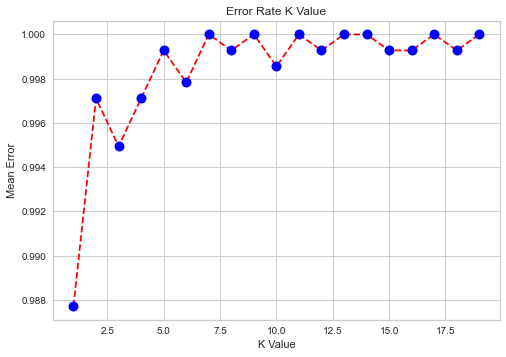

In [113]:
plt.figure()
plt.plot(range(1, 20), error1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [114]:
error2 = []

for i in range(1, 20):
    knnR_clf = KNeighborsRegressor(n_neighbors=i)
    knnR_clf.fit(X2_train, y2_train)
    predknnR = knnR_clf.predict(X2_test)
    error2.append(np.mean(predknnR != y2_test))

Text(0, 0.5, 'Mean Error')

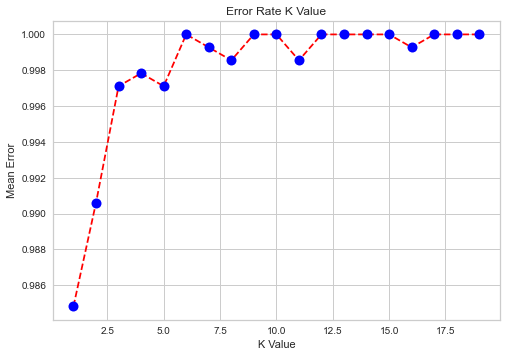

In [115]:
plt.figure()
plt.plot(range(1, 20), error2, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [116]:
knnreg1 = KNeighborsRegressor(n_neighbors=3)
knnreg2 = KNeighborsRegressor(n_neighbors=5)

knnreg1.fit(X1_train, y1_train)
predknnR1 = knnreg1.predict(X1_test)

print("Residual sum of squares: %.2f"% np.mean((predknnR1 - y1_test) ** 2))
print('Variance score: %.2f' % knnreg1.score(X1_test, y1_test))

knnreg2.fit(X2_train, y2_train)
predknnR2 = knnreg2.predict(X2_test)

print("Residual sum of squares: %.2f"% np.mean((predknnR2 - y2_test) ** 2))
print('Variance score: %.2f' % knnreg2.score(X2_test, y2_test))

Residual sum of squares: 6.03
Variance score: 0.23
Residual sum of squares: 5.51
Variance score: 0.29


In [117]:
print("Cross validation mean MSE score using knnreg1 is %s" % (-1 * cross_val_score(knnreg1,X1_train,y1_train,cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using knnreg1 is %s" % (cross_val_score(knnreg1,X1_train,y1_train,cv=5, scoring='r2').mean()))

print("Cross validation mean MSE score using knnreg1 is %s" % (-1 * cross_val_score(knnreg2,X2_train,y2_train,cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using knnreg1 is %s" % (cross_val_score(knnreg2,X2_train,y2_train,cv=5, scoring='r2').mean()))

Cross validation mean MSE score using knnreg1 is 1.7526970682730922
Cross validation mean R2 score using knnreg1 is 0.23933511396161147
Cross validation mean MSE score using knnreg1 is 1.6963418409638558
Cross validation mean R2 score using knnreg1 is 0.29699840156211305


###### RFE ATTEMPT ON LINEAR REGRESSION RIDGE WITH SELECTED FEATURES DATASET:

In [118]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector as SFS

n_features_to_select = 0.50
RFE_LRR2 = RFE(LRR2, n_features_to_select=n_features_to_select, step=1)
RFE_LRR2 = RFE_LRR2.fit(X2_train, y2_train)
RFE_LRR2.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False])

In [119]:
RFE_LRR2.ranking_

array([ 1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1, 12,  1, 13,  8,  1,
       11, 14,  1, 17, 10,  1,  1,  1,  9,  4,  2, 16, 20,  7, 19, 15,  1,
        6,  5,  1, 18])

In [120]:
RFE_LRR2_pred = RFE_LRR2.predict(X2_test)
print("Residual sum of squares: %.2f"% np.mean((RFE_LRR2_pred - y2_test) ** 2))
print('Variance score: %.2f' % RFE_LRR2.score(X2_test, y2_test))

Residual sum of squares: 6.54
Variance score: 0.16


In [122]:
print("Cross validation mean MSE score using LRR1 is %s" % (-1 * cross_val_score(RFE_LRR2,X2_train,y2_train,cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using LRR1 is %s" % (cross_val_score(RFE_LRR2,X2_train,y2_train,cv=5, scoring='r2').mean()))

Cross validation mean MSE score using LRR1 is 1.767855437193441
Cross validation mean R2 score using LRR1 is 0.2048121900251842


In [123]:
X_scaler1_df.to_csv('../data/X_scaler1.csv',index=False)
X_scaler_df_TOTdrop = pd.DataFrame(X_scaler_df_TOTdrop)
X_scaler_df_TOTdrop.to_csv('../data/X_scaler_df_TOTdrop.csv',index=False)